# Load dataset & preprocessing

In [1]:
import pandas as pd
import numpy as np

root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza.csv"
exp_dir = "datasets/infuluenza/LSTM/"

df = pd.read_csv(data_path)

In [2]:
df_tokyo = df[df['regnames'].isin(["Tokyo"])]

df_tokyo.head()

Alltime  Time  region regnames  Longitude    Latitude  Altitude  Year  \
12480    12481     1      13    Tokyo  35.689185  139.691648      34.9  2000   
12481    12482     2      13    Tokyo  35.689185  139.691648      34.9  2000   
12482    12483     3      13    Tokyo  35.689185  139.691648      34.9  2000   
12483    12484     4      13    Tokyo  35.689185  139.691648      34.9  2000   
12484    12485     5      13    Tokyo  35.689185  139.691648      34.9  2000   

       Month  Week  Flucases  Holiday   Tempave   Tempmin    Tempmax  \
12480      1     1       818        2  9.528571  6.371429  13.385714   
12481      1     2      1167        3  8.642857  5.457143  12.000000   
12482      1     3      2562        2  6.828571  4.171429   9.500000   
12483      1     4      3781        2  5.342857  1.542857   9.400000   
12484      1     5      3903        2  7.214286  3.171429  11.585714   

              Rh  
12480  50.571429  
12481  61.142857  
12482  56.000000  
12483  42.000000  
12484  38.714286

Text(0, 0.5, 'Flucases')

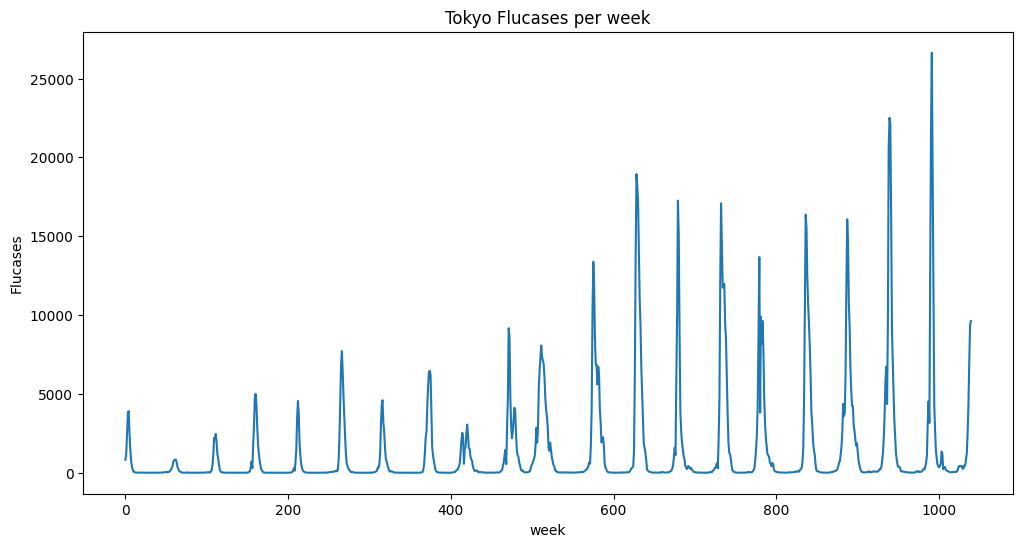

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))

plt.title("Tokyo Flucases per week")
plt.plot(np.arange(len(df_tokyo["Flucases"])), df_tokyo["Flucases"])

plt.xlabel("week")
plt.ylabel("Flucases")

In [4]:
train_n = int(len(df_tokyo["Flucases"])*0.75)
test_n = int(len(df_tokyo["Flucases"])*0.25)
train_n, test_n

(780, 260)

In [5]:
train_steps = np.arange(train_n)
test_steps = np.arange(train_n,train_n + test_n)

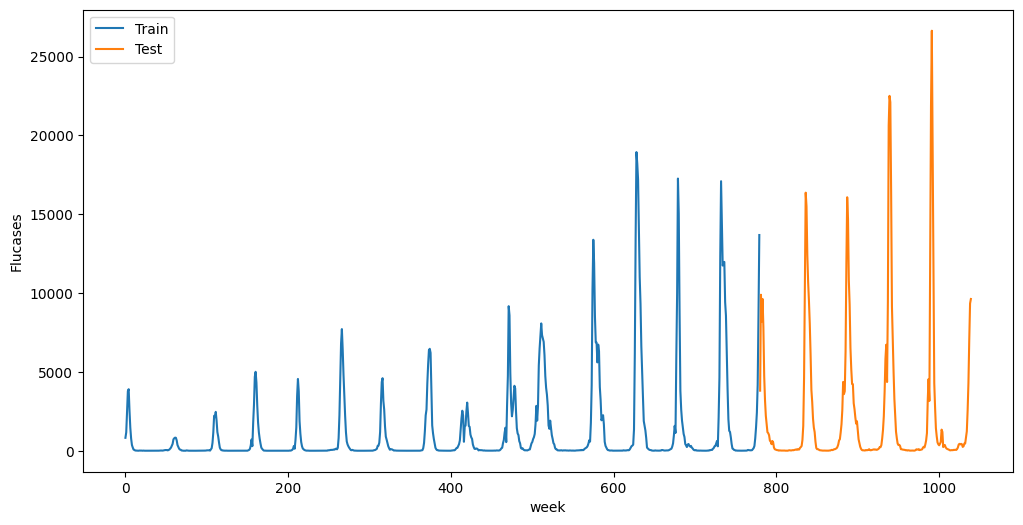

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(train_steps, df_tokyo["Flucases"][0:train_n],label="Train")
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n],label="Test")

plt.xlabel("week")
plt.ylabel("Flucases")
plt.legend()

array([[<Axes: title={'center': 'Flucases'}>,
        <Axes: title={'center': 'Tempave'}>],
       [<Axes: title={'center': 'Rh'}>,
        <Axes: title={'center': 'Holiday'}>]], dtype=object)

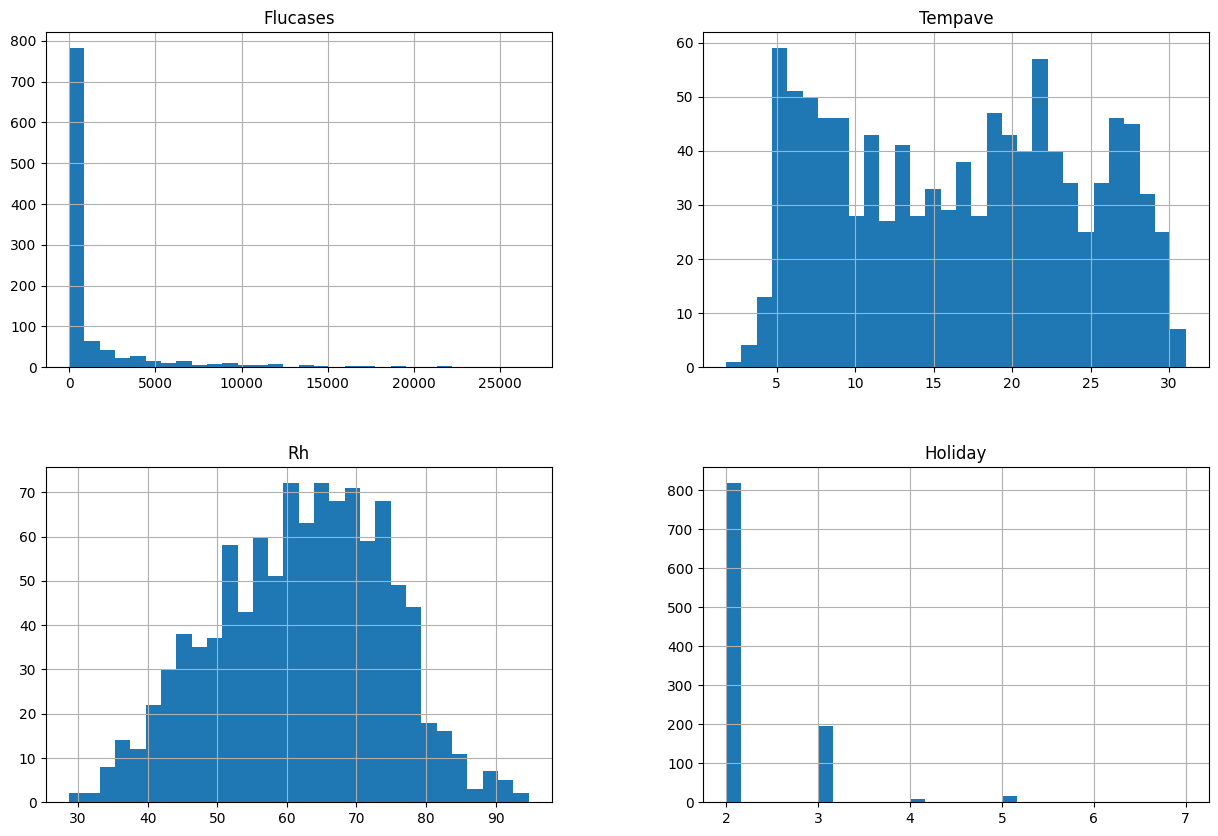

In [7]:
columns = ["Flucases","Tempave", "Rh", "Holiday"]

all_data = df_tokyo[columns]
all_data.hist(bins=30, figsize=(15, 10))

In [8]:
train_df = all_data[columns][0:train_n]
test_df = all_data[columns][train_n:train_n+test_n]

In [9]:
train_df.head()

Flucases   Tempave         Rh  Holiday
12480       818  9.528571  50.571429        2
12481      1167  8.642857  61.142857        3
12482      2562  6.828571  56.000000        2
12483      3781  5.342857  42.000000        2
12484      3903  7.214286  38.714286        2

In [10]:
test_df.head()

Flucases   Tempave         Rh  Holiday
13260      3809  5.357143  47.142857        3
13261      9892  6.285714  38.285714        2
13262      8198  5.628571  53.857143        3
13263      9625  6.771429  63.714286        2
13264      7844  4.228571  49.000000        2

trainとtestのdfを作る

In [11]:
train_ts_df = train_df["Flucases"]
train_ys_df = train_df[["Tempave", "Rh"]]
train_xs_df = train_df["Holiday"]

test_ts_df = test_df["Flucases"]
test_ys_df = test_df[["Tempave", "Rh"]]
test_xs_df = test_df["Holiday"]

# Dataset and DataLoader

In [12]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import torch
import torch.nn as nn
from torch.nn import Sequential, Linear, Tanh, Sigmoid, LeakyReLU, ReLU
import torch.nn.functional as F
import torch.optim as optim

import numpy as np #数値計算用ライブラリ
import matplotlib.pyplot as plt #描画用ライブラリ

In [13]:
root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza.csv"
data_dir = "datasets/infuluenza/vecLSTMx/"
exp_dir = "datasets/infuluenza/LSTM/"

In [14]:
seq_length = 40

train_Xs = np.load(data_dir + "train_X_" + str(seq_length) + "w.npy")
train_ys = np.load(data_dir + "train_y_" + str(seq_length) + "w.npy")

In [15]:
train_Xs.shape, train_ys.shape

((740, 40, 4), (740, 1, 4))

In [16]:
import joblib

# スケーラーの読み込み
std_scaler = joblib.load(data_dir + 'std_scaler.joblib')

In [17]:
train_Xs = np.load(data_dir + "train_Xs_" + str(seq_length) + "w.npy")
train_ys = np.load(data_dir + "train_ys_" + str(seq_length) + "w.npy")
val_Xs = np.load(data_dir + "val_Xs_" + str(seq_length) + "w.npy")
val_ys = np.load(data_dir + "val_ys_" + str(seq_length) + "w.npy")

In [18]:
trn_xs_tensor = torch.Tensor(train_Xs[:,:,0:1])
trn_ys_tensor = torch.Tensor(train_ys[:,:,0:1])

val_xs_tensor = torch.Tensor(val_Xs[:,:,0:1])
val_ys_tensor = torch.Tensor(val_ys[:,:,0:1])

In [19]:
trn_xs_tensor.shape, trn_ys_tensor.shape, val_xs_tensor.shape, val_ys_tensor.shape

(torch.Size([592, 40, 1]),
 torch.Size([592, 1, 1]),
 torch.Size([148, 40, 1]),
 torch.Size([148, 1, 1]))

In [20]:
from torch.utils.data import TensorDataset, DataLoader

trn_dataset = TensorDataset(trn_xs_tensor, trn_ys_tensor)
trn_loader = DataLoader(dataset=trn_dataset,batch_size=50,shuffle=True)

val_dataset = TensorDataset(val_xs_tensor, val_ys_tensor)
val_loader = DataLoader(dataset=val_dataset,batch_size=50,shuffle=False)

In [21]:
for id, batch_data in enumerate(trn_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
1 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
2 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
3 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
4 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
5 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
6 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
7 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
8 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
9 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
10 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
11 torch.Size([42, 40, 1]) torch.Size([42, 1, 1])


In [22]:
for id, batch_data in enumerate(val_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
1 torch.Size([50, 40, 1]) torch.Size([50, 1, 1])
2 torch.Size([48, 40, 1]) torch.Size([48, 1, 1])


In [23]:
#train_ts_df = train_df["Flucases"]
#train_ys_df = train_df[["Tempave", "Rh"]]
#train_xs_df = train_df["Holiday"]

#train_np = np.concatenate([train_ts_np.reshape(-1,1), train_ys_np, train_xs_np.reshape(-1,1)], axis = 1)

# LSTM model

In [24]:
class LSTM(nn.Module):
    def __init__(self, input_size = 1, hidden_size=32, output_size=1, num_layers = 2):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = num_layers
        
        self.relu = ReLU()
        self.lrelu = LeakyReLU(negative_slope=0.01)
        
        # input_sizeは入力する次元数
        self.lstm = nn.LSTM(input_size=self.input_size, num_layers=self.n_layers, hidden_size=self.hidden_size, dropout=0.2)
        
        self.fc1 = nn.Linear(self.hidden_size, self.hidden_size * 4)
        self.fc2 = nn.Linear(self.hidden_size * 4, self.output_size)


    def forward(self, x):
        last_outs, hidden = self.lstm(x) #(batch_size, seq_len, hidden)
        outs = last_outs[:, -1, :] #(batch_size, hidden)
 
        h = self.relu(self.fc1(outs))
        y = self.relu(self.fc2(h))

        return y

In [25]:
model = LSTM(input_size = 1, hidden_size = 16, output_size = 1, num_layers = 1)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Prediction

In [26]:
batch_0x = list(trn_loader)[0][0]

In [27]:
batch_0x.shape

torch.Size([50, 40, 1])

In [28]:
preds = model(batch_0x)

In [29]:
preds.shape

torch.Size([50, 1])

## Train

In [30]:
model.cuda()

LSTM(
  (relu): ReLU()
  (lrelu): LeakyReLU(negative_slope=0.01)
  (lstm): LSTM(1, 16, dropout=0.2)
  (fc1): Linear(in_features=16, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

In [31]:
criterion = nn.MSELoss(reduction='mean').cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [32]:
def val_model(epoch):
    
    model.eval()
    
    sum_errors = 0
    
    for batch_data in val_loader:
       
        with torch.no_grad():
            
            if torch.cuda.is_available():
                inputs, trues = batch_data
                inputs, trues = inputs.cuda(), trues.cuda()

            preds = model(inputs)
            true_y = trues.reshape(preds.shape)
            loss = criterion(preds, true_y)
            
            sum_errors = sum_errors + loss.data.item()

            del loss
            torch.cuda.empty_cache()
            
    return sum_errors / len(val_loader)

In [33]:
train_loss_hist = []
val_loss_hist = []
best_loss = 1e10
n_epochs = 500

for epoch in range(n_epochs):
    
    model.train()
    train_loss = 0
    
    for batch_data in trn_loader:
        
        inputs, trues = batch_data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        optimizer.zero_grad()
        
        preds = model(inputs)
        true_y = trues.reshape(preds.shape)
        loss = criterion(preds, true_y)
        
        loss.backward() #偏微分を計算
        
        train_loss += loss.item()

        #パラメータを更新する
        optimizer.step()
    
    val_loss = val_model(epoch)
    train_loss_hist.append(train_loss / len(trn_loader))
    val_loss_hist.append(val_loss)
    
    print("epoch: ", epoch, "Train loss: ", train_loss / len(trn_loader), "Val loss: ", val_loss)
    
    if val_loss < best_loss:
        save_model_path = exp_dir + "best_model" + ".pt"
        torch.save(model, save_model_path)
        best_loss = val_loss

epoch:  0 Train loss:  0.8977580902477106 Val loss:  0.8178008447090784
epoch:  1 Train loss:  0.8111267723143101 Val loss:  0.7491571207841238
epoch:  2 Train loss:  0.7671581283211708 Val loss:  0.6987496713797251
epoch:  3 Train loss:  0.7146280631422997 Val loss:  0.6466372708479563
epoch:  4 Train loss:  0.6472849436104298 Val loss:  0.5813457121451696
epoch:  5 Train loss:  0.5703728453566631 Val loss:  0.49604057272275287
epoch:  6 Train loss:  0.4632434969147046 Val loss:  0.3865187168121338
epoch:  7 Train loss:  0.3412846572076281 Val loss:  0.2641985242565473
epoch:  8 Train loss:  0.235067467050006 Val loss:  0.1648138922949632
epoch:  9 Train loss:  0.15181524896373352 Val loss:  0.11575531711181004
epoch:  10 Train loss:  0.13767968397587538 Val loss:  0.10354214782516162
epoch:  11 Train loss:  0.1270401494887968 Val loss:  0.10274537528554599
epoch:  12 Train loss:  0.12666593802471957 Val loss:  0.10166677956779797
epoch:  13 Train loss:  0.11623546108603477 Val loss: 

epoch:  111 Train loss:  0.11349871343312164 Val loss:  0.08278290927410126
epoch:  112 Train loss:  0.11163097658815484 Val loss:  0.08294018730521202
epoch:  113 Train loss:  0.11440315035482247 Val loss:  0.08307588224609692
epoch:  114 Train loss:  0.11123841907829046 Val loss:  0.0826345682144165
epoch:  115 Train loss:  0.11243821835766236 Val loss:  0.08251958216230075
epoch:  116 Train loss:  0.11179463813702266 Val loss:  0.08249179646372795
epoch:  117 Train loss:  0.11650146528457601 Val loss:  0.08358503008882205
epoch:  118 Train loss:  0.11305897155155738 Val loss:  0.08309975266456604
epoch:  119 Train loss:  0.11775644108032186 Val loss:  0.0837656060854594
epoch:  120 Train loss:  0.11592930275946856 Val loss:  0.08288090800245602
epoch:  121 Train loss:  0.11417004601874699 Val loss:  0.08295290544629097
epoch:  122 Train loss:  0.11454611799369256 Val loss:  0.08412717779477437
epoch:  123 Train loss:  0.11438657063990831 Val loss:  0.0828069659570853
epoch:  124 Tra

epoch:  223 Train loss:  0.11147894943132997 Val loss:  0.08264234910408656
epoch:  224 Train loss:  0.11239805817604065 Val loss:  0.08329220240314801
epoch:  225 Train loss:  0.10860202321782708 Val loss:  0.08303942282994588
epoch:  226 Train loss:  0.1109620202332735 Val loss:  0.08294772977630298
epoch:  227 Train loss:  0.11008489333714049 Val loss:  0.08309878408908844
epoch:  228 Train loss:  0.10979347815737128 Val loss:  0.08321315795183182
epoch:  229 Train loss:  0.11537760604793827 Val loss:  0.08391135061780612
epoch:  230 Train loss:  0.11215816112235188 Val loss:  0.08260914559165637
epoch:  231 Train loss:  0.1118937354767695 Val loss:  0.08272901674111684
epoch:  232 Train loss:  0.1109225641315182 Val loss:  0.0829353854060173
epoch:  233 Train loss:  0.11176519220074017 Val loss:  0.08327155187726021
epoch:  234 Train loss:  0.11505126285677154 Val loss:  0.08281153067946434
epoch:  235 Train loss:  0.12354306938747565 Val loss:  0.08391702796022098
epoch:  236 Trai

epoch:  335 Train loss:  0.1146455096701781 Val loss:  0.08483638614416122
epoch:  336 Train loss:  0.11209882004186511 Val loss:  0.08393243700265884
epoch:  337 Train loss:  0.1136321488302201 Val loss:  0.08416794488827388
epoch:  338 Train loss:  0.11081488477066159 Val loss:  0.08381134644150734
epoch:  339 Train loss:  0.11200171134745081 Val loss:  0.08364740138252576
epoch:  340 Train loss:  0.10988708616544803 Val loss:  0.08405997852484386
epoch:  341 Train loss:  0.11434328431884448 Val loss:  0.08386917536457379
epoch:  342 Train loss:  0.11115119388947885 Val loss:  0.08462513486544292
epoch:  343 Train loss:  0.11185003444552422 Val loss:  0.08457282309730847
epoch:  344 Train loss:  0.11284051928669214 Val loss:  0.08400145048896472
epoch:  345 Train loss:  0.11168260810275872 Val loss:  0.0842989335457484
epoch:  346 Train loss:  0.1114574063103646 Val loss:  0.0850175271431605
epoch:  347 Train loss:  0.11286172519127528 Val loss:  0.08496404563387235
epoch:  348 Train

epoch:  447 Train loss:  0.11084605489547054 Val loss:  0.08246653154492378
epoch:  448 Train loss:  0.1129857065776984 Val loss:  0.08352531244357426
epoch:  449 Train loss:  0.11272651810819904 Val loss:  0.08313762644926707
epoch:  450 Train loss:  0.11246025934815407 Val loss:  0.08239541451136272
epoch:  451 Train loss:  0.11033340139935414 Val loss:  0.08287285268306732
epoch:  452 Train loss:  0.11090003792196512 Val loss:  0.08236762508749962
epoch:  453 Train loss:  0.11204401489036779 Val loss:  0.08285209536552429
epoch:  454 Train loss:  0.1127141669082145 Val loss:  0.08275448779265086
epoch:  455 Train loss:  0.11513039066145818 Val loss:  0.08388011530041695
epoch:  456 Train loss:  0.10923427700375517 Val loss:  0.08312938983241717
epoch:  457 Train loss:  0.11156595665185402 Val loss:  0.08260618522763252
epoch:  458 Train loss:  0.11274431094837685 Val loss:  0.08233658721049626
epoch:  459 Train loss:  0.11266725432748596 Val loss:  0.0826049583653609
epoch:  460 Tra

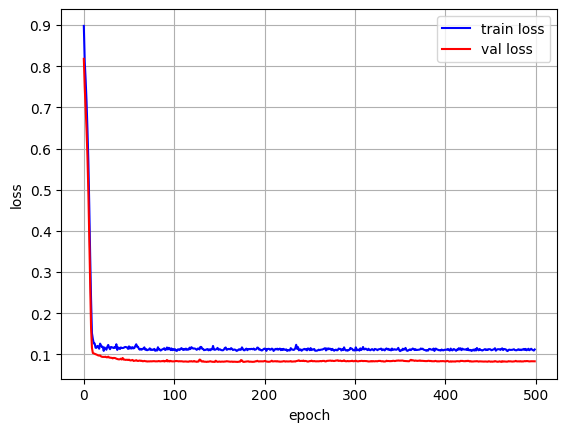

In [34]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss_hist)), train_loss_hist, c='b', label='train loss')
plt.plot(range(len(val_loss_hist)), val_loss_hist, c='r', label='val loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

In [35]:
np.argmin(val_loss_hist), np.min(val_loss_hist)

(177, 0.08190690850218137)

In [26]:
save_model_path = exp_dir + "best_model" + ".pt"

model = torch.load(save_model_path)

### Scatter plot

In [27]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(trn_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()

        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        preds = model(inputs)
        true_y = trues.reshape(preds.shape)
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_y.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [28]:
np.array(trues_list).shape, np.array(preds_list).shape

((592, 1, 1), (592, 1, 1))

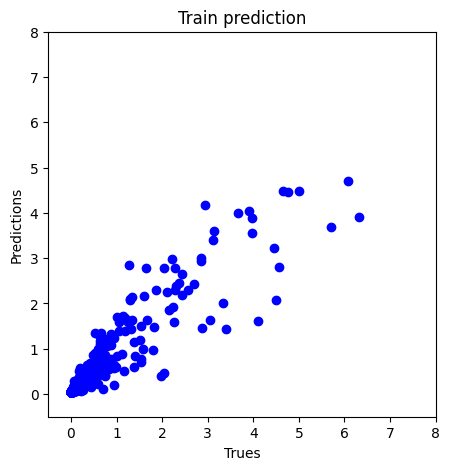

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Train prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.xlim(-0.5, 8)
plt.ylim(-0.5, 8)

plt.show()

In [30]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(val_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()

        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        preds = model(inputs)
        true_y = trues.reshape(preds.shape)
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_y.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147


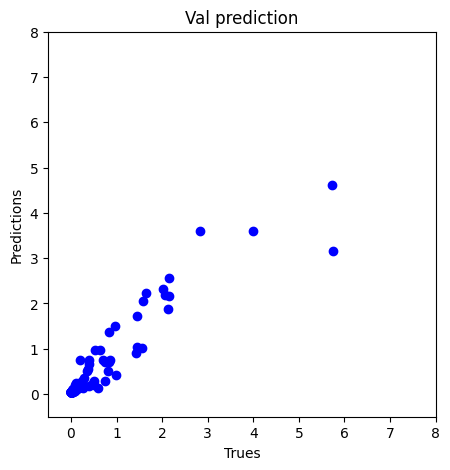

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Val prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.xlim(-0.5, 8)
plt.ylim(-0.5, 8)

plt.show()

## Test prediction

In [32]:
#test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

train_np = np.load(data_dir + "train_np.npy")
test_np = np.load(data_dir + "test_np.npy")

In [33]:
train_np.shape, test_np.shape

((780, 4), (260, 4))

In [34]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

test_scaled_ts = (np.array(test_np[:,0]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [35]:
test_scaled_ys = std_scaler.transform(test_np[:,1:3])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
test_scaled_ys.shape, test_scaled_ts.reshape(-1,1).shape, test_np[:,-1].shape

((260, 2), (260, 1), (260,))

In [37]:
test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_np[:,-1].reshape(-1,1)], axis = 1)

In [38]:
test_all_np.shape

(260, 4)

In [39]:
test_np[:,-1].shape, test_scaled_ts.shape, test_scaled_ys.shape, test_np.shape

((260,), (260,), (260, 2), (260, 4))

### 1. Prediction based on results from 40 days ago

In [40]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [41]:
#何週前のデータから予測するか

seq_length = 40

test_Xs, test_ys = make_sequence_data(test_all_np, seq_length)

In [42]:
test_Xs.shape, test_ys.shape

((220, 40, 4), (220, 1, 4))

In [43]:
tst_xs_tensor = torch.Tensor(test_Xs[:,:,0:1])
tst_ys_tensor = torch.Tensor(test_ys[:,:,0:1])

In [44]:
from torch.utils.data import TensorDataset, DataLoader

tst_dataset = TensorDataset(tst_xs_tensor, tst_ys_tensor)

In [45]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(tst_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()

        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        preds = model(inputs)
        true_y = trues.reshape(preds.shape)
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_y.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219


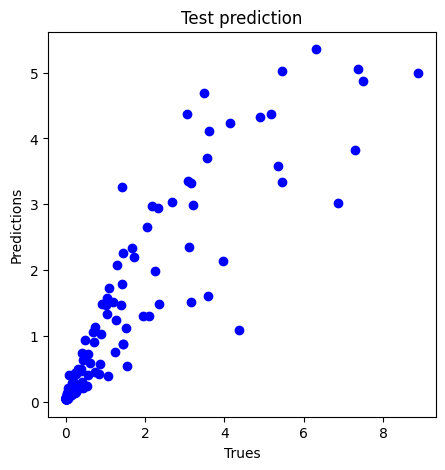

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [47]:
tst_trues, tst_preds = np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0]

In [48]:
tst_preds = (np.array(preds_list)[:,:,0] - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

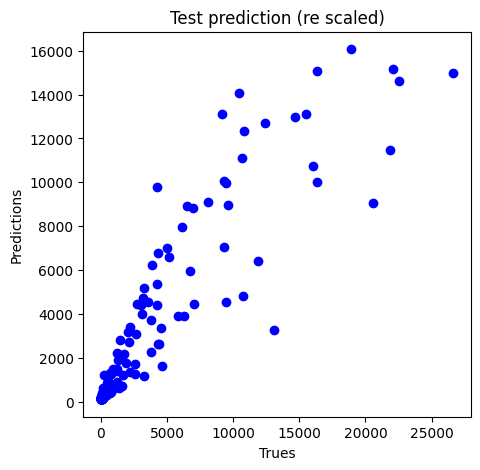

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_np[seq_length:,0], tst_preds, c = "b") # 散布図を描画
plt.title("Test prediction (re scaled)")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [50]:
tst_preds.shape

(220, 1)

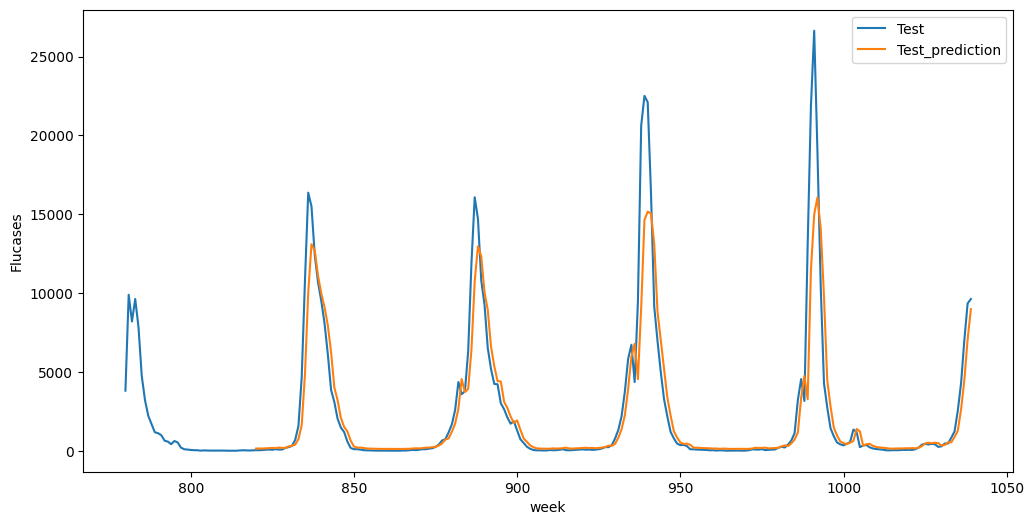

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n],label="Test")
plt.plot(test_steps[seq_length:], tst_preds,label="Test_prediction")

plt.xlabel("week")
plt.ylabel("Flucases")
plt.legend()

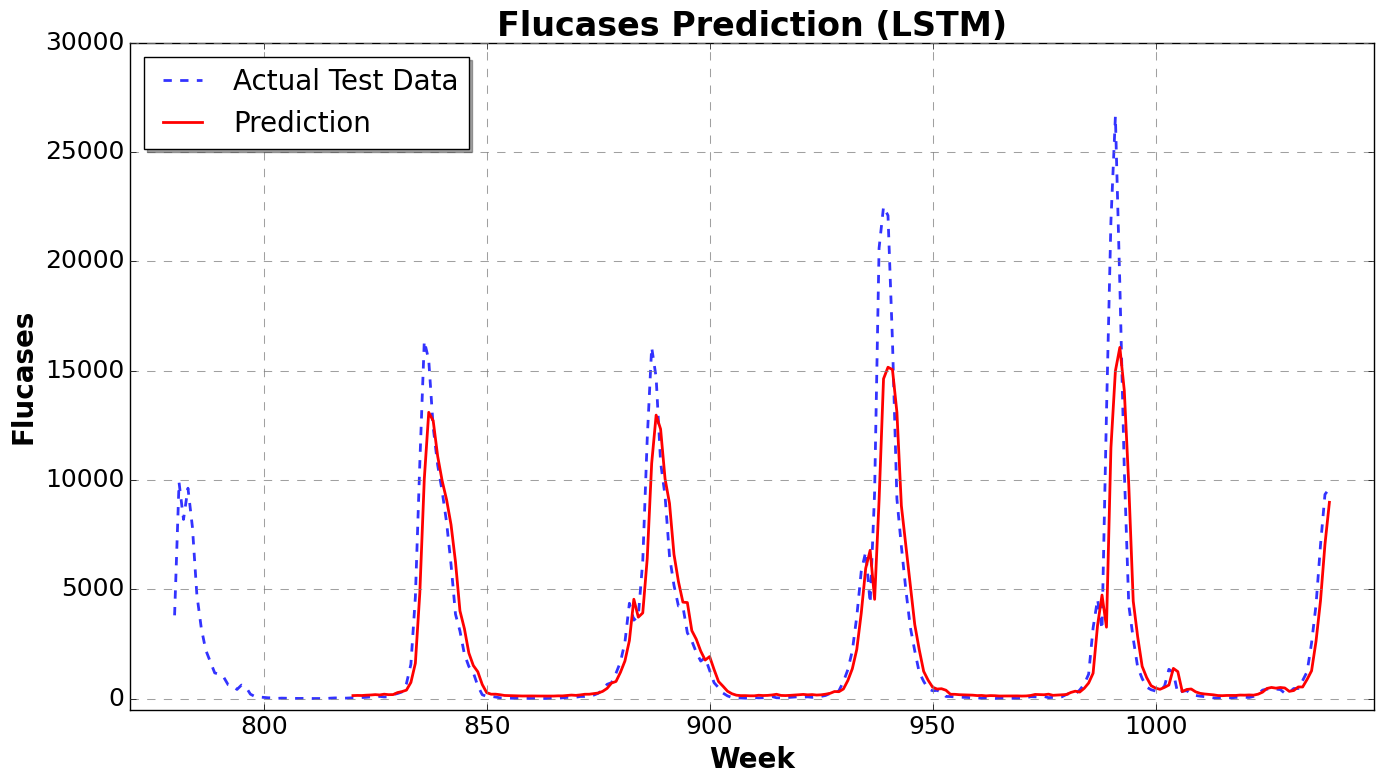

In [52]:
plt.figure(figsize=(14, 8))
plt.style.use('classic')  # スタイリッシュな背景に変更

# 実際のデータと予測データをプロット
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n], label="Actual Test Data", linestyle='--', linewidth=2, color='blue', alpha=0.8)
plt.plot(test_steps[seq_length:], tst_preds, label="Prediction", linestyle='-', linewidth=2, color='red', alpha=1.0)

# 軸ラベルとタイトルを追加
plt.xlabel("Week", fontsize=20, fontweight='bold')
plt.ylabel("Flucases", fontsize=20, fontweight='bold')
plt.title("Flucases Prediction (LSTM)", fontsize=24, fontweight='bold')

# グリッドの調整
plt.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.75)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 凡例の調整
plt.legend(fontsize=20, loc='upper left', frameon=True, shadow=True)
plt.ylim(bottom=-500)
plt.xlim(left=min(test_steps) - 10, right = max(test_steps) + 10)

# 仕上げ
plt.tight_layout()
plt.savefig("Flucases Prediction (LSTM).jpg", dpi=200, bbox_inches='tight', format='jpg')
plt.show()

In [56]:
from sklearn.metrics import (
    mean_squared_error,  # MSE
    mean_absolute_error,  # MAE
    r2_score, # R2
)

from scipy.stats import pearsonr

def reg_metric(trues, preds, name):
    mse = mean_squared_error(trues, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)
    r, p = pearsonr(trues, preds)
    
    print(name)
    print(f'MSE : {mse}.')
    print(f'RMSE : {rmse}.')
    print(f'MAE : {mae}.')
    print(f'R2 : {r2}.')
    print("pearson :", r, p)

In [57]:
reg_metric(test_np[seq_length:,0], tst_preds[:,0], "Flucases")

Flucases
MSE : 4299556.084270881.
RMSE : 2073.5370949830826.
MAE : 848.2566331950101.
R2 : 0.8140277315573415.
pearson : 0.915259531455443 4.954543481743193e-88


### 2. step by step prediction

In [260]:
len(tst_dataset)

220

In [261]:
init_dat = tst_dataset[0]

In [262]:
init_inputs, init_trues = init_dat

In [263]:
init_inputs.shape, init_trues.shape

(torch.Size([40, 1]), torch.Size([1, 1]))

In [264]:
init_inputs, init_trues = init_inputs.cuda(), init_trues.cuda()
        
init_inputs = torch.reshape(init_inputs, (1, seq_length, 1))
init_trues = torch.reshape(init_trues, (1, 1, 1))
        
preds = model(init_inputs)

In [265]:
preds.shape

torch.Size([1, 1])

In [266]:
preds_cat = torch.reshape(preds, (1, 1, 1))

In [267]:
preds_cat.shape, init_inputs.shape

(torch.Size([1, 1, 1]), torch.Size([1, 40, 1]))

In [268]:
stack_inputs = torch.cat([init_inputs, preds_cat], dim=1)

In [269]:
stack_inputs.shape

torch.Size([1, 41, 1])

In [270]:
test_np.shape

(260, 4)

In [271]:
from torch.utils.data import TensorDataset, DataLoader

#test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_np[:,-1].reshape(-1,1)], axis = 1)

tst_input_tensor = torch.from_numpy(test_np[:,-1].reshape(-1,1).astype(np.float32)).clone()
tst_input_dataset = TensorDataset(tst_input_tensor)

In [272]:
stack_inputs.shape, len(tst_input_dataset)

(torch.Size([1, 41, 1]), 260)

In [273]:
stack_inputs.shape, preds.shape

(torch.Size([1, 41, 1]), torch.Size([1, 1]))

In [274]:
model.eval()

with torch.no_grad():
    for id, tst_input in enumerate(list(tst_input_dataset)[len(stack_inputs[0]):]):
        print(id)

        pred = model(stack_inputs[:,-seq_length:,:].cuda())
        pred = torch.reshape(pred, (1, 1, 1))
        stack_inputs = torch.cat([stack_inputs, pred], dim=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218


In [275]:
stack_inputs.shape, len(tst_input_dataset)

(torch.Size([1, 260, 1]), 260)

In [276]:
ae_scaled_preds = stack_inputs[0][:,0].to('cpu').detach().numpy().copy()

In [277]:
ae_scaled_preds.shape

(260,)

In [278]:
test_scaled_ts.shape

(260,)

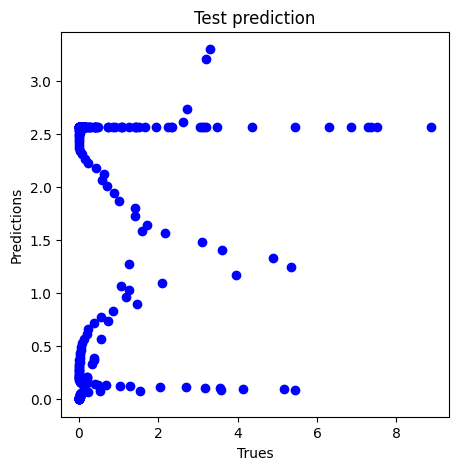

In [279]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_scaled_ts, ae_scaled_preds, c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [280]:
#rescaled_tst_trues = (np.array(test_scaled_ts) - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min
rescaled_tst_preds = (np.array(ae_scaled_preds) - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

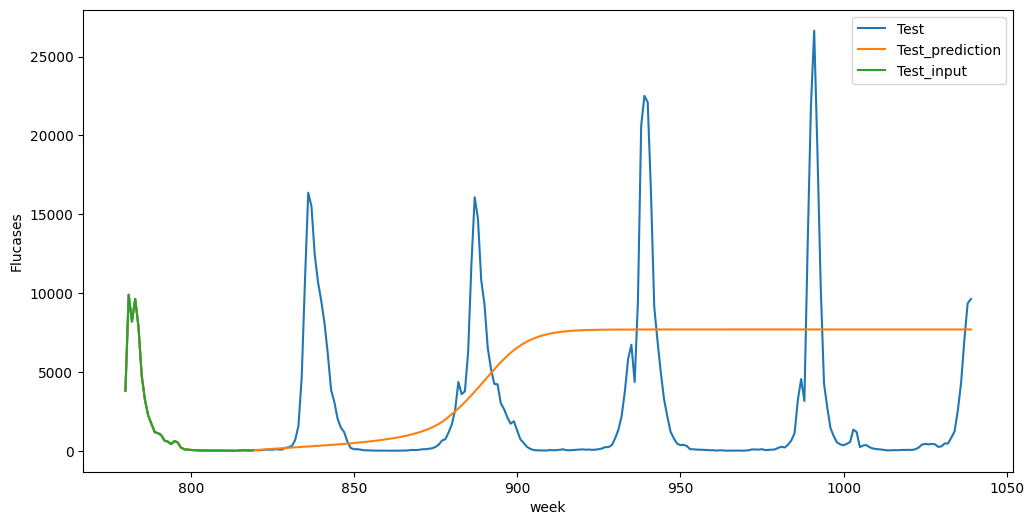

In [281]:
plt.figure(figsize=(12, 6))
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n],label="Test")
plt.plot(test_steps, rescaled_tst_preds,label="Test_prediction")
plt.plot(test_steps[0:seq_length], rescaled_tst_preds[0:seq_length],label="Test_input")

plt.xlabel("week")
plt.ylabel("Flucases")
plt.legend()

# Bidirectional LSTM model

In [67]:
class bdLSTM(nn.Module):
    def __init__(self, input_size = 1, hidden_size=32, output_size=1, num_layers = 2):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = num_layers
        
        self.relu = ReLU()
        self.lrelu = LeakyReLU(negative_slope=0.01)
        
        # input_sizeは入力する次元数
        self.lstm = nn.LSTM(input_size=self.input_size, num_layers=self.n_layers, hidden_size=self.hidden_size, dropout=0.2, bidirectional=True)
        
        self.fc1 = nn.Linear(self.hidden_size * 2, self.hidden_size * 4)
        self.fc2 = nn.Linear(self.hidden_size * 4, self.output_size)


    def forward(self, x):
        last_outs, hidden = self.lstm(x) #(batch_size, seq_len, hidden)
        outs = last_outs[:, -1, :] #(batch_size, hidden)
 
        h = self.relu(self.fc1(outs))
        y = self.relu(self.fc2(h))

        return y

In [68]:
bimodel = bdLSTM(input_size = 1, hidden_size = 16, output_size = 1, num_layers = 1)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## prediction

In [103]:
batch_0x = list(trn_loader)[0][0]

In [105]:
batch_0x.shape

torch.Size([50, 40, 1])

In [107]:
preds = bimodel(batch_0x)

## Train

In [108]:
bimodel.cuda()

bdLSTM(
  (relu): ReLU()
  (lrelu): LeakyReLU(negative_slope=0.01)
  (lstm): LSTM(1, 16, dropout=0.2, bidirectional=True)
  (fc1): Linear(in_features=32, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

In [109]:
criterion = nn.MSELoss(reduction='mean').cuda()
optimizer = optim.Adam(bimodel.parameters(), lr=1e-3)

In [111]:
def val_model(epoch):
    
    bimodel.eval()
    
    sum_errors = 0
    
    for batch_data in val_loader:
       
        with torch.no_grad():
            
            if torch.cuda.is_available():
                inputs, trues = batch_data
                inputs, trues = inputs.cuda(), trues.cuda()

            preds = bimodel(inputs)
            true_y = trues.reshape(preds.shape)
            loss = criterion(preds, true_y)
            
            sum_errors = sum_errors + loss.data.item()

            del loss
            torch.cuda.empty_cache()
            
    return sum_errors / len(val_loader)

In [112]:
train_loss_hist = []
val_loss_hist = []
best_loss = 1e10
n_epochs = 500

for epoch in range(n_epochs):
    
    bimodel.train()
    train_loss = 0
    
    for batch_data in trn_loader:
        
        inputs, trues = batch_data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        optimizer.zero_grad()
        
        preds = bimodel(inputs)
        true_y = trues.reshape(preds.shape)
        loss = criterion(preds, true_y)
        
        loss.backward() #偏微分を計算
        
        train_loss += loss.item()

        #パラメータを更新する
        optimizer.step()
    
    val_loss = val_model(epoch)
    train_loss_hist.append(train_loss / len(trn_loader))
    val_loss_hist.append(val_loss)
    
    print("epoch: ", epoch, "Train loss: ", train_loss / len(trn_loader), "Val loss: ", val_loss)
    
    if val_loss < best_loss:
        save_model_path = exp_dir + "best_bimodel" + ".pt"
        torch.save(bimodel, save_model_path)
        best_loss = val_loss

epoch:  0 Train loss:  0.8635160140693188 Val loss:  0.7828528434038162
epoch:  1 Train loss:  0.785149447619915 Val loss:  0.7306716243426005
epoch:  2 Train loss:  0.7393847604592642 Val loss:  0.6804164896408716
epoch:  3 Train loss:  0.6846742425113916 Val loss:  0.6143847356239954
epoch:  4 Train loss:  0.6009242025514444 Val loss:  0.517754058043162
epoch:  5 Train loss:  0.487147228171428 Val loss:  0.3931940520803134
epoch:  6 Train loss:  0.3493070363377531 Val loss:  0.2670564154783885
epoch:  7 Train loss:  0.24452899396419525 Val loss:  0.16015654926498732
epoch:  8 Train loss:  0.15119323103378216 Val loss:  0.10229339078068733
epoch:  9 Train loss:  0.13234618647644916 Val loss:  0.08783892914652824
epoch:  10 Train loss:  0.12093805056065321 Val loss:  0.08563973754644394
epoch:  11 Train loss:  0.11678978831817706 Val loss:  0.08643047139048576
epoch:  12 Train loss:  0.11952783695111673 Val loss:  0.08655073617895444
epoch:  13 Train loss:  0.11696398894612987 Val loss

epoch:  110 Train loss:  0.11456437269225717 Val loss:  0.08028701320290565
epoch:  111 Train loss:  0.11668012787898381 Val loss:  0.08078211049238841
epoch:  112 Train loss:  0.11874256748706102 Val loss:  0.07994202648599942
epoch:  113 Train loss:  0.11191568740954001 Val loss:  0.08035510405898094
epoch:  114 Train loss:  0.11072629628082116 Val loss:  0.07978417848547299
epoch:  115 Train loss:  0.1133311487113436 Val loss:  0.08046794558564822
epoch:  116 Train loss:  0.11263864968592922 Val loss:  0.0800296242038409
epoch:  117 Train loss:  0.11380660254508257 Val loss:  0.08051410938302676
epoch:  118 Train loss:  0.11209609111150105 Val loss:  0.08023111149668694
epoch:  119 Train loss:  0.11570039422561725 Val loss:  0.08045372366905212
epoch:  120 Train loss:  0.10965574951842427 Val loss:  0.08007704218228658
epoch:  121 Train loss:  0.11187716340646148 Val loss:  0.08090815568963687
epoch:  122 Train loss:  0.1114056243871649 Val loss:  0.08010685319701831
epoch:  123 Tra

epoch:  223 Train loss:  0.11049866474544008 Val loss:  0.08067271982630093
epoch:  224 Train loss:  0.11195570649579167 Val loss:  0.08012881378332774
epoch:  225 Train loss:  0.11497070842112105 Val loss:  0.08148886760075887
epoch:  226 Train loss:  0.11296325425306956 Val loss:  0.0804585429529349
epoch:  227 Train loss:  0.11098549049347639 Val loss:  0.08092119793097179
epoch:  228 Train loss:  0.1132876065870126 Val loss:  0.08085366835196812
epoch:  229 Train loss:  0.11062990237648289 Val loss:  0.08080886180202167
epoch:  230 Train loss:  0.11041739575254421 Val loss:  0.0811242088675499
epoch:  231 Train loss:  0.11465739148358504 Val loss:  0.08115991453329723
epoch:  232 Train loss:  0.11133428057655692 Val loss:  0.0807683952152729
epoch:  233 Train loss:  0.1136152249140044 Val loss:  0.08067997793356578
epoch:  234 Train loss:  0.10930409701541066 Val loss:  0.08111924678087234
epoch:  235 Train loss:  0.11166639517371853 Val loss:  0.08131018405159314
epoch:  236 Train

epoch:  334 Train loss:  0.1138374162837863 Val loss:  0.0805447722474734
epoch:  335 Train loss:  0.11030361009761691 Val loss:  0.08003626887996991
epoch:  336 Train loss:  0.11378595512360334 Val loss:  0.07983974864085515
epoch:  337 Train loss:  0.11148795268187921 Val loss:  0.08005222802360852
epoch:  338 Train loss:  0.11153153112779061 Val loss:  0.0809398964047432
epoch:  339 Train loss:  0.11091608313533168 Val loss:  0.07996367663145065
epoch:  340 Train loss:  0.11280843708664179 Val loss:  0.07980101679762204
epoch:  341 Train loss:  0.11221370038886865 Val loss:  0.0804927113155524
epoch:  342 Train loss:  0.11152633838355541 Val loss:  0.08137472594777743
epoch:  343 Train loss:  0.1113714948296547 Val loss:  0.08146027848124504
epoch:  344 Train loss:  0.11238343905036648 Val loss:  0.08095166087150574
epoch:  345 Train loss:  0.11261289396012823 Val loss:  0.08114817614356677
epoch:  346 Train loss:  0.11044427438173443 Val loss:  0.0805107665558656
epoch:  347 Train 

epoch:  443 Train loss:  0.1130544460999469 Val loss:  0.0816970889767011
epoch:  444 Train loss:  0.111467979537944 Val loss:  0.08107602223753929
epoch:  445 Train loss:  0.11238192875559132 Val loss:  0.0814493993918101
epoch:  446 Train loss:  0.1110721208776037 Val loss:  0.08115043366948764
epoch:  447 Train loss:  0.11149147463341554 Val loss:  0.08063243826230367
epoch:  448 Train loss:  0.11113905867872138 Val loss:  0.080935999751091
epoch:  449 Train loss:  0.10936337523162365 Val loss:  0.08124153191844623
epoch:  450 Train loss:  0.11122780898585916 Val loss:  0.08106695860624313
epoch:  451 Train loss:  0.11102730315178633 Val loss:  0.08126648391286533
epoch:  452 Train loss:  0.11037194115730624 Val loss:  0.08091866225004196
epoch:  453 Train loss:  0.11175147661318381 Val loss:  0.08107228328784306
epoch:  454 Train loss:  0.1114340745843947 Val loss:  0.08093789716561635
epoch:  455 Train loss:  0.1098238251482447 Val loss:  0.08151455720265706
epoch:  456 Train loss

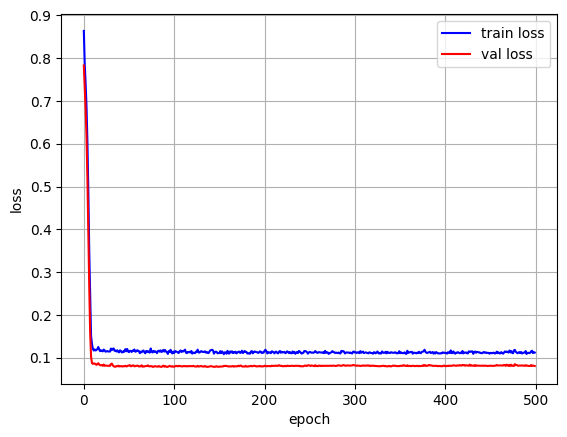

In [113]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss_hist)), train_loss_hist, c='b', label='train loss')
plt.plot(range(len(val_loss_hist)), val_loss_hist, c='r', label='val loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

In [114]:
np.argmin(val_loss_hist), np.min(val_loss_hist)

(86, 0.07849605629841487)

In [69]:
save_model_path = exp_dir + "best_bimodel" + ".pt"

bimodel = torch.load(save_model_path)

### Scatter plot

In [70]:
preds_list = []
trues_list = []

bimodel.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(trn_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()

        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        preds = bimodel(inputs)
        true_y = trues.reshape(preds.shape)
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_y.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

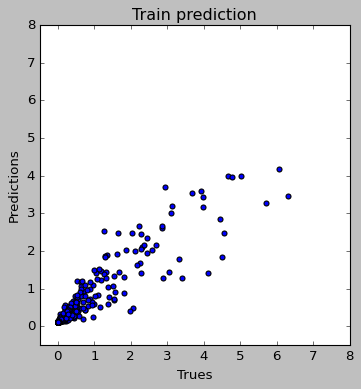

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Train prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.xlim(-0.5, 8)
plt.ylim(-0.5, 8)

plt.show()

In [72]:
preds_list = []
trues_list = []

bimodel.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(val_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()

        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        preds = bimodel(inputs)
        true_y = trues.reshape(preds.shape)
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_y.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147


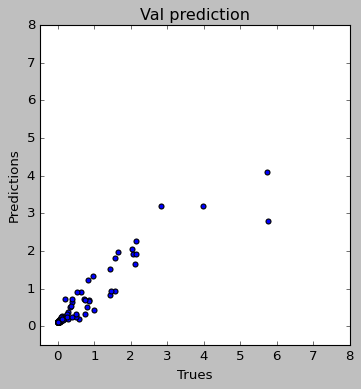

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Val prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.xlim(-0.5, 8)
plt.ylim(-0.5, 8)

plt.show()

## Test Prediction

In [74]:
#test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

train_np = np.load(data_dir + "train_np.npy")
test_np = np.load(data_dir + "test_np.npy")

In [75]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

test_scaled_ts = (np.array(test_np[:,0]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [76]:
test_scaled_ys = std_scaler.transform(test_np[:,1:3])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [77]:
test_scaled_ys.shape, test_scaled_ts.reshape(-1,1).shape, test_np[:,-1].shape

((260, 2), (260, 1), (260,))

In [78]:
test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_np[:,-1].reshape(-1,1)], axis = 1)

### 1. Prediction based on results from 40 days ago

In [79]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [80]:
#何週前のデータから予測するか

seq_length = 40

test_Xs, test_ys = make_sequence_data(test_all_np, seq_length)

In [81]:
tst_xs_tensor = torch.Tensor(test_Xs[:,:,0:1])
tst_ys_tensor = torch.Tensor(test_ys[:,:,0:1])

In [82]:
from torch.utils.data import TensorDataset, DataLoader

tst_dataset = TensorDataset(tst_xs_tensor, tst_ys_tensor)

In [83]:
preds_list = []
trues_list = []

bimodel.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(tst_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()

        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        preds = bimodel(inputs)
        true_y = trues.reshape(preds.shape)
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_y.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219


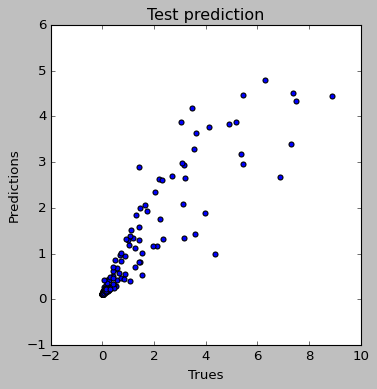

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [85]:
tst_trues, tst_preds = np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0]

In [86]:
tst_preds = (np.array(preds_list)[:,:,0] - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

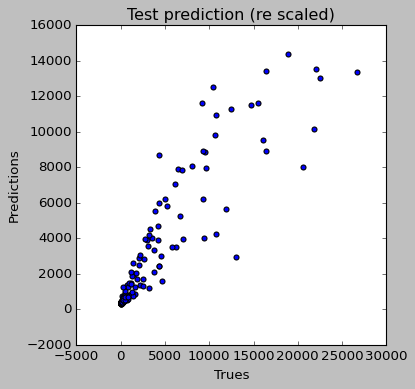

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_np[seq_length:,0], tst_preds, c = "b") # 散布図を描画
plt.title("Test prediction (re scaled)")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

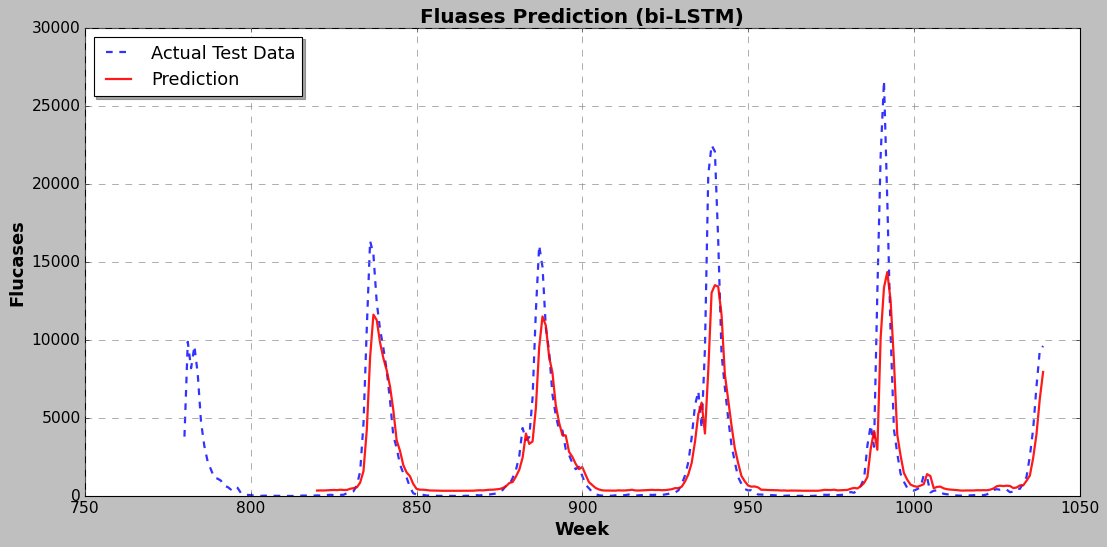

In [89]:
plt.figure(figsize=(14, 7))
plt.style.use('classic')  # スタイリッシュな背景に変更

# 実際のデータと予測データをプロット
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n], label="Actual Test Data", linestyle='--', linewidth=2, color='blue', alpha=0.8)
plt.plot(test_steps[seq_length:], tst_preds, label="Prediction", linestyle='-', linewidth=2, color='red', alpha=0.9)

# 軸ラベルとタイトルを追加
plt.xlabel("Week", fontsize=16, fontweight='bold')
plt.ylabel("Flucases", fontsize=16, fontweight='bold')
plt.title("Fluases Prediction (bi-LSTM)", fontsize=18, fontweight='bold')

# グリッドの調整
plt.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.75)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 凡例の調整
plt.legend(fontsize=16, loc='upper left', frameon=True, shadow=True)

# 仕上げ
plt.tight_layout()
plt.show()

In [90]:
from sklearn.metrics import (
    mean_squared_error,  # MSE
    mean_absolute_error,  # MAE
    r2_score, # R2
)

from scipy.stats import pearsonr

def reg_metric(trues, preds, name):
    mse = mean_squared_error(trues, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)
    r, p = pearsonr(trues, preds)
    
    print(name)
    print(f'MSE : {mse}.')
    print(f'RMSE : {rmse}.')
    print(f'MAE : {mae}.')
    print(f'R2 : {r2}.')
    print("pearson :", r, p)

In [91]:
test_np[seq_length:,0].shape, tst_preds[:,0].shape

((220,), (220,))

In [92]:
reg_metric(test_np[seq_length:,0], tst_preds[:,0], "Flucases")

Flucases
MSE : 5164571.76609066.
RMSE : 2272.5694194216953.
MAE : 1013.5796415849165.
R2 : 0.7766124902083553.
pearson : 0.9167236346212734 8.043749633700192e-89


### 2. step by step prediction

In [282]:
init_dat = tst_dataset[0]

In [283]:
init_inputs, init_trues = init_dat

In [284]:
init_inputs, init_trues = init_inputs.cuda(), init_trues.cuda()
        
init_inputs = torch.reshape(init_inputs, (1, seq_length, 1))
init_trues = torch.reshape(init_trues, (1, 1, 1))
        
preds = model(init_inputs)

In [285]:
preds_cat = torch.reshape(preds, (1, 1, 1))

In [286]:
stack_inputs = torch.cat([init_inputs, preds_cat], dim=1)

In [287]:
from torch.utils.data import TensorDataset, DataLoader

#test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_np[:,-1].reshape(-1,1)], axis = 1)

tst_input_tensor = torch.from_numpy(test_np[:,-1].reshape(-1,1).astype(np.float32)).clone()
tst_input_dataset = TensorDataset(tst_input_tensor)

In [288]:
bimodel.eval()

with torch.no_grad():
    for id, tst_input in enumerate(list(tst_input_dataset)[len(stack_inputs[0]):]):
        print(id)

        pred = bimodel(stack_inputs[:,-seq_length:,:].cuda())
        pred = torch.reshape(pred, (1, 1, 1))
        stack_inputs = torch.cat([stack_inputs, pred], dim=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218


In [289]:
ae_scaled_preds = stack_inputs[0][:,0].to('cpu').detach().numpy().copy()

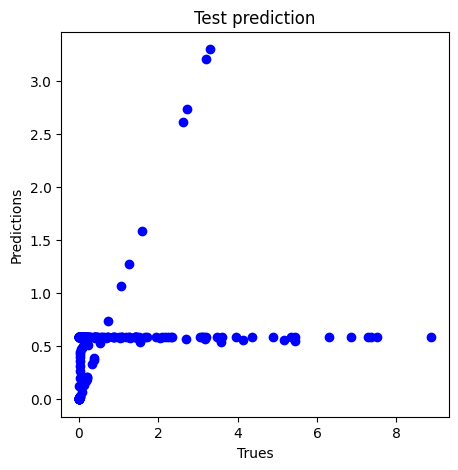

In [290]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_scaled_ts, ae_scaled_preds, c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [291]:
#rescaled_tst_trues = (np.array(test_scaled_ts) - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min
rescaled_tst_preds = (np.array(ae_scaled_preds) - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

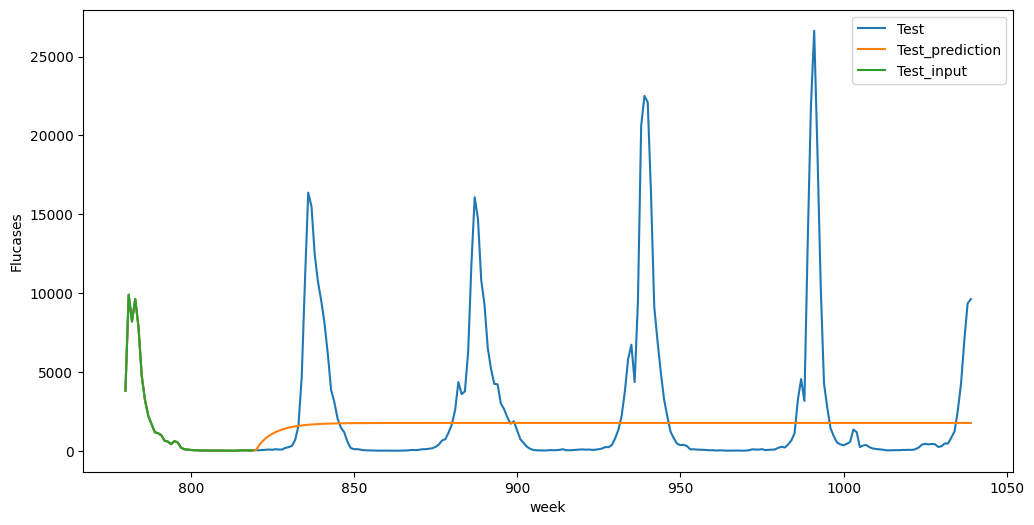

In [292]:
plt.figure(figsize=(12, 6))
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n],label="Test")
plt.plot(test_steps, rescaled_tst_preds,label="Test_prediction")
plt.plot(test_steps[0:seq_length], rescaled_tst_preds[0:seq_length],label="Test_input")

plt.xlabel("week")
plt.ylabel("Flucases")
plt.legend()